In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [4]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [5]:
data_location = "archive/training_set/training_set/"
dataset = datasets.ImageFolder(data_location, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [6]:
from torchvision import transforms

# Define transformations for data augmentation
augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor

])

# Apply data augmentation to your dataset
augmented_dataset = datasets.ImageFolder(data_location, transform=augment)
augmented_dataloader = DataLoader(augmented_dataset, batch_size=32, shuffle=True)


Batch Labels: tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0])


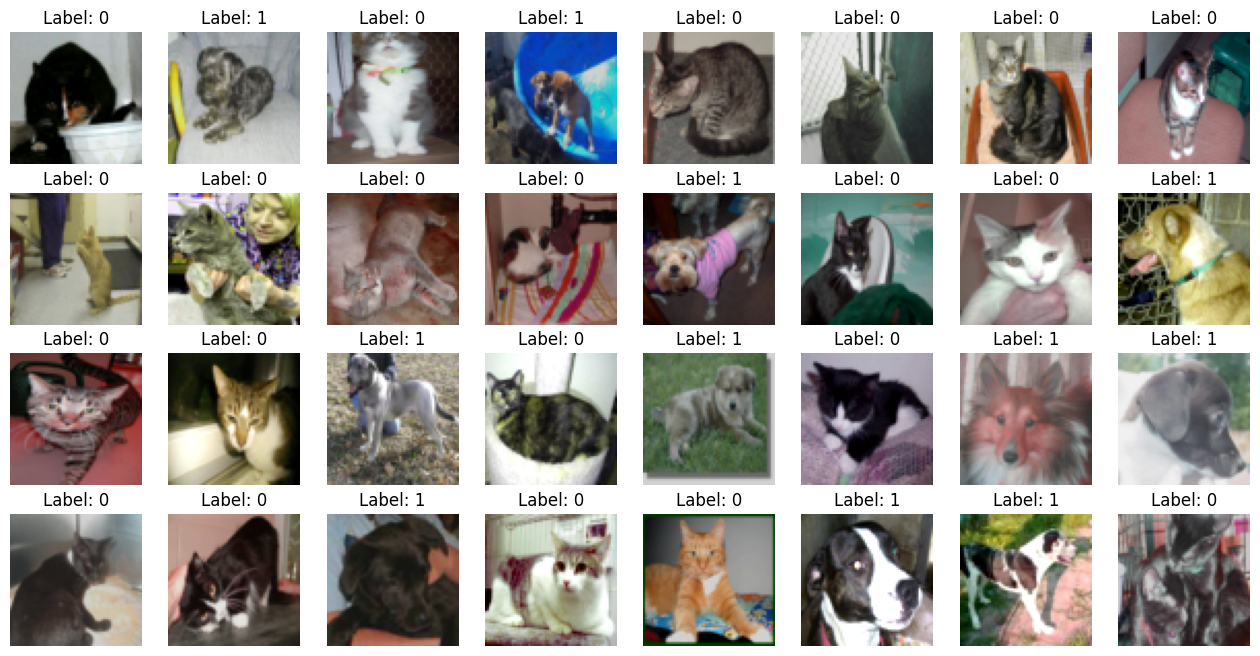

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined the DataLoader and transform

# Get a batch of data from the DataLoader
for batch_idx, (images, labels) in enumerate(augmented_dataloader):
    # Print the labels of the images in the batch
    print("Batch Labels:", labels)

    # Display the images and labels
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.transpose(images[i], (1, 2, 0)))  # Convert (C, H, W) to (H, W, C)
        ax.set_title("Label: {}".format(labels[i].item()))
        ax.axis('off')
    
    plt.show()

    # Break after one batch to prevent showing all batches
    break


In [8]:
class CatDogClassification(nn.Module):
    def __init__(self):
        super(CatDogClassification, self).__init__()
        self.conv1 = nn.Conv2d(3,8,kernel_size=3,stride=1)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,kernel_size=3,stride=1)
        self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(16,32,kernel_size=3,stride=1)
        self.pool3 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(6*6*32,512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,1)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm2d(8)
        self.batch_norm2 = nn.BatchNorm2d(16)
        self.batch_norm3 = nn.BatchNorm2d(32)
    def forward(self, x):
        x = self.batch_norm1(F.relu(self.conv1(x)))
        x = self.pool1(x)
        x = self.batch_norm2(F.relu(self.conv2(x)))
        x = self.pool2(x)
        x = self.batch_norm3(F.relu(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(-1, 6 * 6 * 32) #Flattening to [1, 1152]
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x


In [150]:
model = CatDogClassification()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)


epochs = 50

for epoch in range(epochs):
    for inputs, labels in dataloader:
        labels = labels.view(-1,1).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    

Epoch 1, Loss: 0.46220675110816956
Epoch 2, Loss: 0.5871960520744324
Epoch 3, Loss: 0.6657534241676331
Epoch 4, Loss: 0.4584747850894928
Epoch 5, Loss: 0.3920251727104187
Epoch 6, Loss: 0.1297050416469574
Epoch 7, Loss: 0.23575666546821594
Epoch 8, Loss: 0.5174254179000854
Epoch 9, Loss: 0.18184681236743927
Epoch 10, Loss: 0.015780283138155937
Epoch 11, Loss: 0.02774270996451378
Epoch 12, Loss: 0.1420052945613861
Epoch 13, Loss: 0.0731506422162056
Epoch 14, Loss: 0.2659619450569153
Epoch 15, Loss: 0.1374036967754364
Epoch 16, Loss: 0.0401129350066185
Epoch 17, Loss: 0.0033152163960039616
Epoch 18, Loss: 0.049923744052648544
Epoch 19, Loss: 0.0008594303508289158
Epoch 20, Loss: 0.48535704612731934
Epoch 21, Loss: 0.33242109417915344
Epoch 22, Loss: 0.0010277109686285257
Epoch 23, Loss: 0.051350969821214676
Epoch 24, Loss: 0.007997913286089897
Epoch 25, Loss: 0.22999632358551025
Epoch 26, Loss: 0.05927704647183418
Epoch 27, Loss: 0.09779714792966843
Epoch 28, Loss: 0.023921674117445946
E

In [9]:
torch.save(model.state_dict(), "model_weights_added_normalization_and_dropout.pth")

NameError: name 'model' is not defined

In [11]:
model = CatDogClassification()
model.load_state_dict(torch.load("model_weights_after_dataaugmentation.pth"))


<All keys matched successfully>

In [207]:
for epoch in range(epochs):
    for inputs, labels in augmented_dataloader:
        labels = labels.view(-1,1).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.177514910697937
Epoch 2, Loss: 0.0018631977727636695
Epoch 3, Loss: 1.4655636548995972
Epoch 4, Loss: 0.0061561344191432
Epoch 5, Loss: 0.012512621469795704
Epoch 6, Loss: 0.11634478718042374
Epoch 7, Loss: 0.17021051049232483
Epoch 8, Loss: 0.011924921534955502
Epoch 9, Loss: 1.741366531859967e-06
Epoch 10, Loss: 0.417652428150177
Epoch 11, Loss: 0.010733374394476414
Epoch 12, Loss: 0.018312988802790642
Epoch 13, Loss: 0.41800832748413086
Epoch 14, Loss: 0.1128745898604393
Epoch 15, Loss: 0.0009542281040921807
Epoch 16, Loss: 0.011218201369047165
Epoch 17, Loss: 0.22215428948402405
Epoch 18, Loss: 0.16770701110363007
Epoch 19, Loss: 0.0002615362172946334
Epoch 20, Loss: 0.018146149814128876
Epoch 21, Loss: 1.7691726684570312
Epoch 22, Loss: 0.028687644749879837
Epoch 23, Loss: 0.010967082343995571
Epoch 24, Loss: 0.0236153956502676
Epoch 25, Loss: 0.001150208991020918
Epoch 26, Loss: 1.5807126760482788
Epoch 27, Loss: 0.0010983694810420275
Epoch 28, Loss: 0.0129010099

In [236]:
torch.save(model.state_dict(), "model_weights_after_dataaugmentation.pth")

In [208]:
test_data = "archive/test_set/test_set"
test_dataset = datasets.ImageFolder(data_location, transform=transform)
test_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [209]:
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    total = 0
    correct = 0
    criterion = nn.BCELoss()  # Define the loss function
    total_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in test_loader:
            inputs = torch.tensor(inputs, dtype=torch.float32)
            labels = torch.tensor(labels, dtype=torch.float32).view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Assuming binary classification and threshold of 0.5
            predicted = (outputs > 0.5).float()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    avg_loss = total_loss / len(test_loader)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Average Loss: {avg_loss:.4f}')

# Call the evaluation function
evaluate_model(model, test_loader)


/tmp/ipykernel_12516/2909977413.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs, dtype=torch.float32)
/tmp/ipykernel_12516/2909977413.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).view(-1, 1)


Accuracy: 0.9998
Average Loss: 0.0014


torch.Size([1, 3, 64, 64])


/tmp/ipykernel_12516/154987570.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_img_tensor = torch.tensor(input_img, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
/tmp/ipykernel_12516/154987570.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.float32).view(-1, 1)


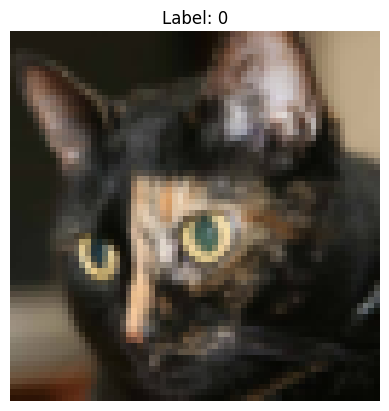

Model Output: 1.8724983874562895e-07
Loss: 1.8724985295648366e-07
Accuracy: True


In [212]:
def evaluate_model_single(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    criterion = nn.BCELoss()  # Define the loss function

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in test_loader:
            # Take only the first input and label from the batch
            input_img = inputs[0]
            label = labels[0]

            # Convert input and label to tensors
            input_img_tensor = torch.tensor(input_img, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
            print(input_img_tensor.shape)
            label_tensor = torch.tensor(label, dtype=torch.float32).view(-1, 1)

            # Display the image
            plt.imshow(np.transpose(input_img, (1, 2, 0)))
            plt.title(f"Label: {label}")
            plt.axis('off')
            plt.show()

            # Perform model inference
            outputs = model(input_img_tensor)
            print("Model Output:", outputs.item())

            # Calculate loss
            loss = criterion(outputs, label_tensor)
            print("Loss:", loss.item())

            # Assuming binary classification and threshold of 0.5
            predicted = (outputs > 0.5).float()

            # Calculate accuracy
            accuracy = (predicted == label_tensor).item()
            print("Accuracy:", accuracy)

            break  # Break after evaluating one input

# Call the evaluation function
evaluate_model_single(model, test_loader)


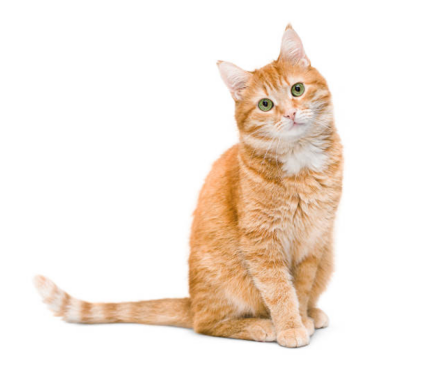

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_img_path = "users_test_set/test3.jpg"

# Load the image
img = mpimg.imread(test_img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [13]:
from PIL import Image
image = Image.open(test_img_path)
image_tensor = transform(image.convert("RGB")).unsqueeze(0)
print(image_tensor.shape)
model.eval()
output = model(image_tensor).item()
print(output)
if output <= 0.5:
    print("Cat")
else:
    print("Dog")


torch.Size([1, 3, 64, 64])
0.8112428188323975
Dog
